In [1]:
from langgraph.graph import END, StateGraph, START

graph = StateGraph(dict)

def retrieve(state):
    state["documents"] = ["doc1", "doc2"]
    return state

def analyze(state):
    state["analysis"] = {"score": 0.95}
    return state

def answer(state):
    return {"answer": "Here is the answer"}

graph.add_node("retrieve", retrieve)
graph.add_node("analyze", analyze)
graph.add_node("answer", answer)

graph.add_edge(START, "retrieve")
graph.add_edge("retrieve", "analyze")
graph.add_edge("analyze", "answer")
graph.add_edge("answer", END)

app = graph.compile()

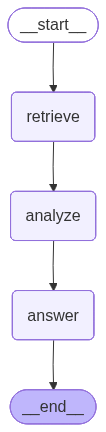

In [2]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [3]:
print(app.invoke({"query": "Agent란 무엇인가?"}))  

{'answer': 'Here is the answer'}
